
🔄 RUNNING MODULE 1: AD SPEND RECONCILIATION...

--- 📊 CFO AUDIT REPORT (GENERATED) ---
| Client   | Transaction_ID   |   Spend_GBP |   Amount_GBP | Status                            |
|:---------|:-----------------|------------:|-------------:|:----------------------------------|
| Client A | FB-2024-001      |      5000   |         5000 | OK: Reconciled                    |
| Client A | FB-2024-002      |     12500   |        12500 | OK: Reconciled                    |
| Client B | FB-2024-003      |      4500.5 |         4000 | RISK: Overspend of £500.5         |
| Client C | FB-2024-004      |      8000   |          nan | CRITICAL: Invoice Missing in Xero |
| Client B | FB-2024-005      |      3200   |         3200 | OK: Reconciled                    |
✅ Output saved: 'Reconciliation_Exception_Report.csv'


🔄 RUNNING MODULE 2: SQUAD PROFITABILITY MODEL...


/tmp/ipython-input-2349815135.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Squad_Name', y='Margin_%', data=df_squad, palette=colors)


✅ Dashboard saved: 'Squad_Profitability_Dashboard.png'

--- 📈 SQUAD PERFORMANCE DATA ---
| Squad_Name      |   Monthly_Retainer |   Total_Cost |   Margin_% |
|:----------------|-------------------:|-------------:|-----------:|
| Alpha (Tech)    |              50000 |        42000 |    16      |
| Beta (Creative) |              45000 |        30000 |    33.3333 |
| Gamma (Scale)   |              60000 |        27000 |    55      |
| Delta (New)     |              20000 |        19500 |     2.5    |


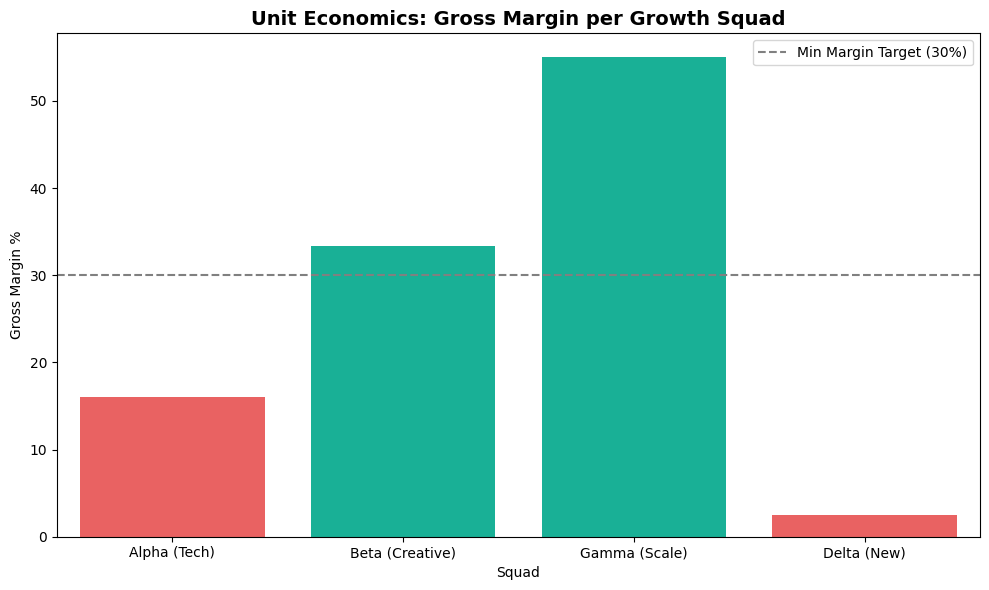

In [1]:
# ==========================================
# AGENCY FINANCE AUTOMATION ENGINE
# Author: Vishwa Y Bhatt
# Purpose: Automated Financial Control & Strategic Unit Economics
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ======================================================
# 🔍 MODULE 1: MEDIA SPEND RECONCILIATION
# Purpose: Match Facebook Ad Invoices vs. Xero Ledger
# ======================================================
print("\n🔄 RUNNING MODULE 1: AD SPEND RECONCILIATION...")

# 1. Simulate "Messy" Raw Data Inputs (The Truth)
fb_data = {
    'Transaction_ID': ['FB-2024-001', 'FB-2024-002', 'FB-2024-003', 'FB-2024-004', 'FB-2024-005'],
    'Client': ['Client A', 'Client A', 'Client B', 'Client C', 'Client B'],
    'Spend_GBP': [5000.00, 12500.00, 4500.50, 8000.00, 3200.00],
    'Date': ['2024-10-01', '2024-10-02', '2024-10-05', '2024-10-06', '2024-10-07']
}
df_fb = pd.DataFrame(fb_data)

# 2. Simulate Internal Ledger Data (What we recorded)
xero_data = {
    'Ref_ID': ['FB-2024-001', 'FB-2024-002', 'FB-2024-003', 'FB-2024-005'], # NOTE: 004 is MISSING
    'Ledger_Account': ['Client A - Funds', 'Client A - Funds', 'Client B - Funds', 'Client B - Funds'],
    'Amount_GBP': [5000.00, 12500.00, 4000.00, 3200.00] # NOTE: 003 has a variance
}
df_xero = pd.DataFrame(xero_data)

# 3. The Logic Engine (Matching)
audit_df = pd.merge(df_fb, df_xero, left_on='Transaction_ID', right_on='Ref_ID', how='left')

# Calculate Variance
audit_df['Variance'] = audit_df['Amount_GBP'] - audit_df['Spend_GBP']

# 4. Automated Risk Flagging
def flag_risk(row):
    if pd.isna(row['Amount_GBP']):
        return "CRITICAL: Invoice Missing in Xero"
    elif row['Variance'] < -10:
        return f"RISK: Overspend of £{abs(row['Variance'])}"
    elif row['Variance'] > 10:
        return f"REVIEW: Under Budget by £{row['Variance']}"
    else:
        return "OK: Reconciled"

audit_df['Status'] = audit_df.apply(flag_risk, axis=1)

# Export Report
print("\n--- 📊 CFO AUDIT REPORT (GENERATED) ---")
print(audit_df[['Client', 'Transaction_ID', 'Spend_GBP', 'Amount_GBP', 'Status']].to_markdown(index=False))
audit_df.to_csv('Reconciliation_Exception_Report.csv', index=False)
print("✅ Output saved: 'Reconciliation_Exception_Report.csv'")


# ======================================================
# 📈 MODULE 2: STRATEGIC SQUAD ECONOMICS
# Purpose: Calculate Gross Margin per Growth Squad
# ======================================================
print("\n\n🔄 RUNNING MODULE 2: SQUAD PROFITABILITY MODEL...")

# 1. Define Squad Structures
squad_data = {
    'Squad_Name': ['Alpha (Tech)', 'Beta (Creative)', 'Gamma (Scale)', 'Delta (New)'],
    'Monthly_Retainer': [50000, 45000, 60000, 20000],
    'Internal_Headcount_Cost': [15000, 25000, 20000, 18000],
    'Freelancer_Spend': [25000, 2000, 5000, 500], # Alpha spends huge on freelancers
    'Tech_Stack_Alloc': [2000, 3000, 2000, 1000]
}
df_squad = pd.DataFrame(squad_data)

# 2. Calculate Margins
df_squad['Total_Cost'] = df_squad['Internal_Headcount_Cost'] + df_squad['Freelancer_Spend'] + df_squad['Tech_Stack_Alloc']
df_squad['Gross_Margin'] = df_squad['Monthly_Retainer'] - df_squad['Total_Cost']
df_squad['Margin_%'] = (df_squad['Gross_Margin'] / df_squad['Monthly_Retainer']) * 100

# 3. Generate Visual Dashboard
plt.figure(figsize=(10, 6))
# Color logic: Red if margin < 30%, Green if healthy
colors = ['#FF4C4C' if x < 30 else '#00C9A7' for x in df_squad['Margin_%']]
sns.barplot(x='Squad_Name', y='Margin_%', data=df_squad, palette=colors)

plt.axhline(30, color='grey', linestyle='--', label='Min Margin Target (30%)')
plt.title('Unit Economics: Gross Margin per Growth Squad', fontsize=14, fontweight='bold')
plt.ylabel('Gross Margin %')
plt.xlabel('Squad')
plt.legend()
plt.tight_layout()

# Save Chart
plt.savefig('Squad_Profitability_Dashboard.png')
print("✅ Dashboard saved: 'Squad_Profitability_Dashboard.png'")

print("\n--- 📈 SQUAD PERFORMANCE DATA ---")
print(df_squad[['Squad_Name', 'Monthly_Retainer', 'Total_Cost', 'Margin_%']].to_markdown(index=False))